<a href="https://colab.research.google.com/github/kishansheth/BilliardsAssistant/blob/master/BilliardsAssistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [11]:
# mount drive for file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Interfaces/Billiards/images/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Interfaces/Billiards/images


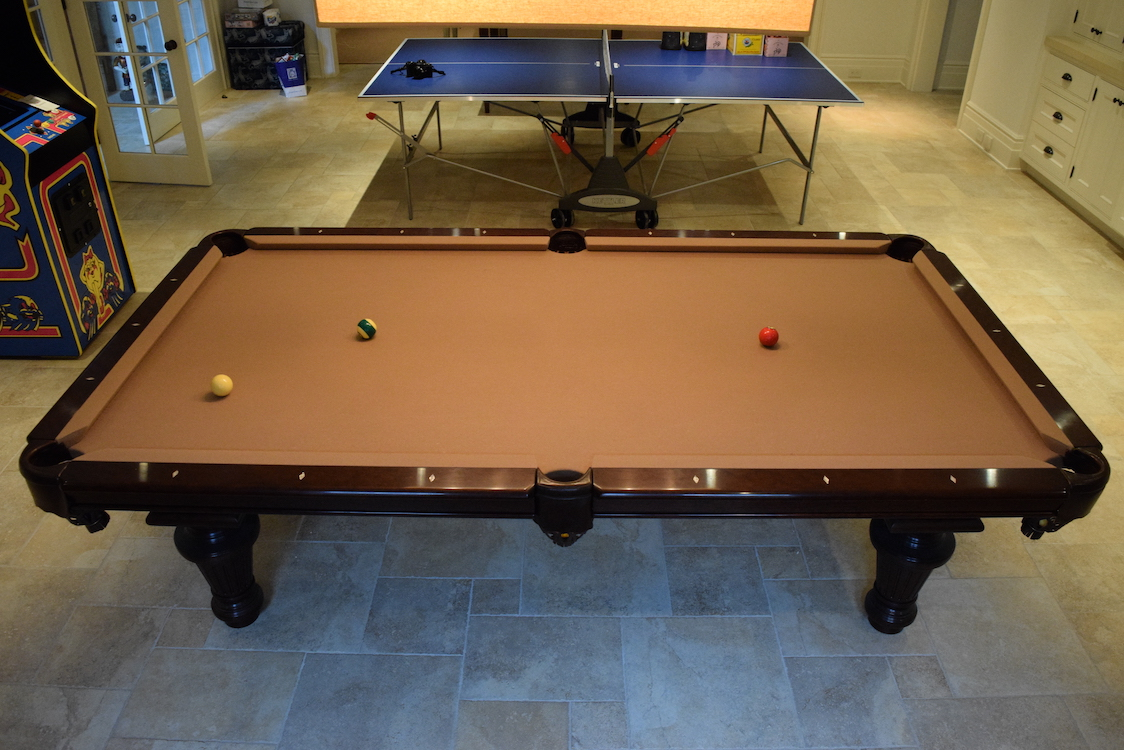

In [25]:
# import test image
im = cv2.imread('DSC_0440.JPG')
cv2.resize(im, (1124, 750))
cv2_imshow(im)

(750, 1124, 3)


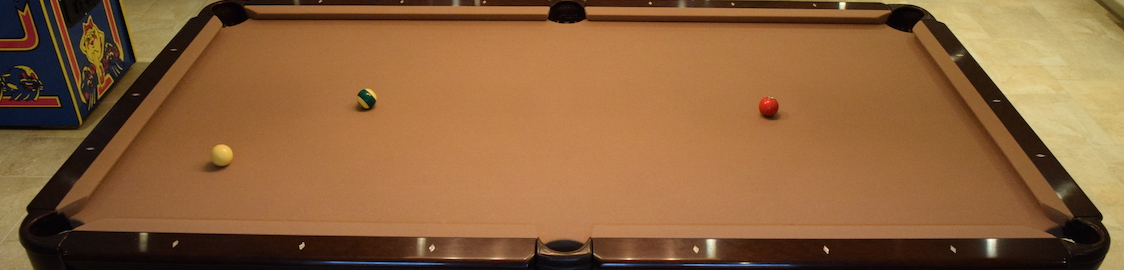

In [34]:
# crop image
print(im.shape)
im2 = im[230:500][:]
cv2_imshow(im2)

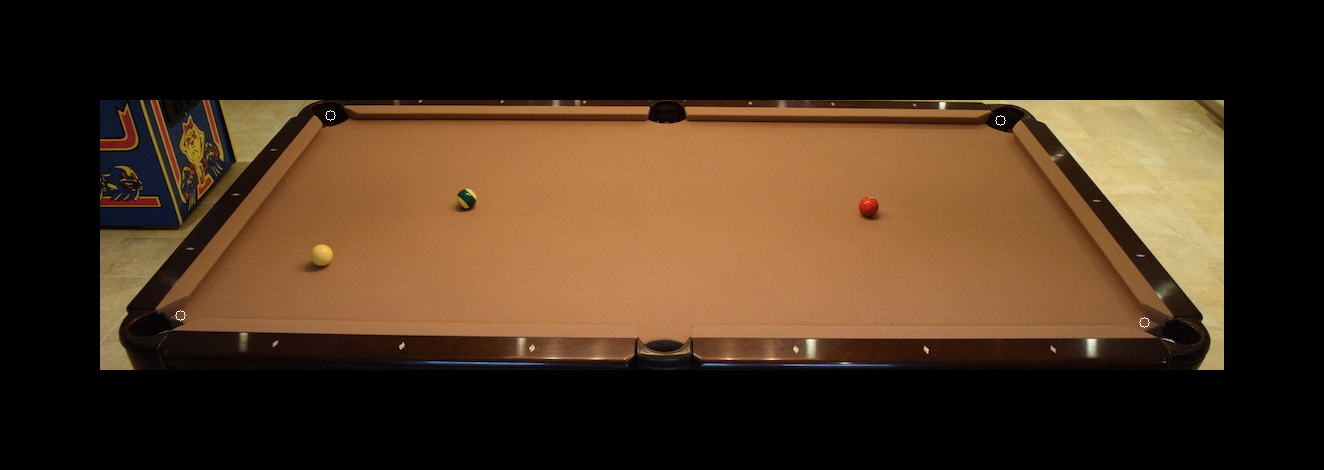

[[ 330.  115.]
 [ 180.  315.]
 [1000.  120.]
 [1144.  322.]]
[[200. 100.]
 [200. 400.]
 [800. 100.]
 [800. 400.]]
[[ 1.17452057e+00  1.46254847e+00 -2.90800750e+02]
 [-2.35136724e-02  3.13306169e+00 -2.20050525e+02]
 [-2.29016274e-05  2.89111400e-03  1.00000000e+00]]


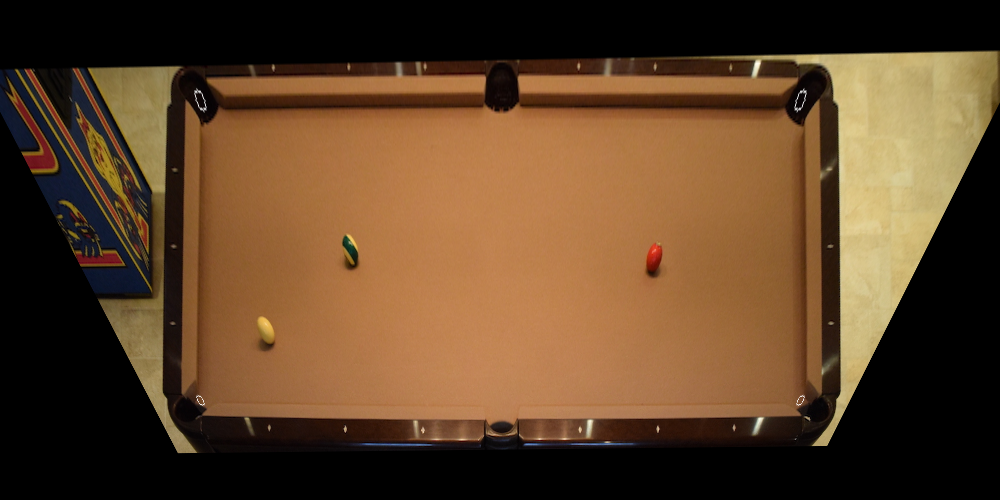

In [90]:
im3 = cv2.copyMakeBorder(im2, 100,100,100,100, cv2.BORDER_CONSTANT, value=0)

cv2_imshow(im3)

In [0]:
# find corners
corners = [[330, 115], [1000, 120], [180, 315], [1144, 322]]

for corner in corners:
  cv2.circle(im3, tuple(corner), 5, [255, 255, 255], thickness=1, lineType=8, shift=0)


corners_new = [[200, 100], [800, 100], [200, 400], [800, 400]]

def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
	rect[0] = pts[0]
	rect[2] = pts[1]
	rect[1] = pts[2]
	rect[3] = pts[3]

	return rect

points = order_points(corners)
points_new = order_points(corners_new)
print(points)
print(points_new)

# compute homography
H = cv2.findHomography(points, points_new)
print(H[0])


# apply homography
im3_warped = cv2.warpPerspective(im3, H[0], (1000, 500))

cv2_imshow(im3_warped)